<a href="https://colab.research.google.com/github/AmirAzz/Test/blob/main/weed.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**GPU activation test** 

In [1]:
!nvidia-smi


Sun Jun 11 09:49:22 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   47C    P8    10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

**Define  Active Directory**

In [2]:
import os
HOME = os.getcwd()
print(HOME)

/content


**Install requirments**

In [3]:
# Pip install method (recommended)

!pip install ultralytics==8.0.28

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 23.3/78.2 GB disk)


**Import Libraries**

In [4]:
from ultralytics import YOLO

from IPython.display import display, Image

**Import Images  Dataset**

In [5]:
!pip install -q roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="vi4sAIgCTFi0H4tZwvA4")
project = rf.workspace("kios-alpsc").project("weed-ob2ta")
dataset = project.version(1).download("yolov8")


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 9.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 6.9 MB/s eta 0:00:00
loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics<=8.0.20 is required but found version=8.0.28, to fix: `pip install ultralytics<=8.0.20`


Extracting Dataset Version Zip to weed-1 in yolov8:: 100%|██████████| 230/230 [00:00<00:00, 720.78it/s]


**Training step**

In [8]:
%cd {HOME}

!yolo task=segment mode=train model=yolov8s-seg.pt data=/content/weed-1/data.yaml epochs=20 imgsz=640

/content
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=segment, mode=train, model=yolov8s-seg.pt, data=/content/weed-1/data.yaml, epochs=20, patience=50, batch=16, imgsz=640, save=True, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False, int8=False, dynamic=False, simplify=False, opset

**Conusion Matrix**

/content


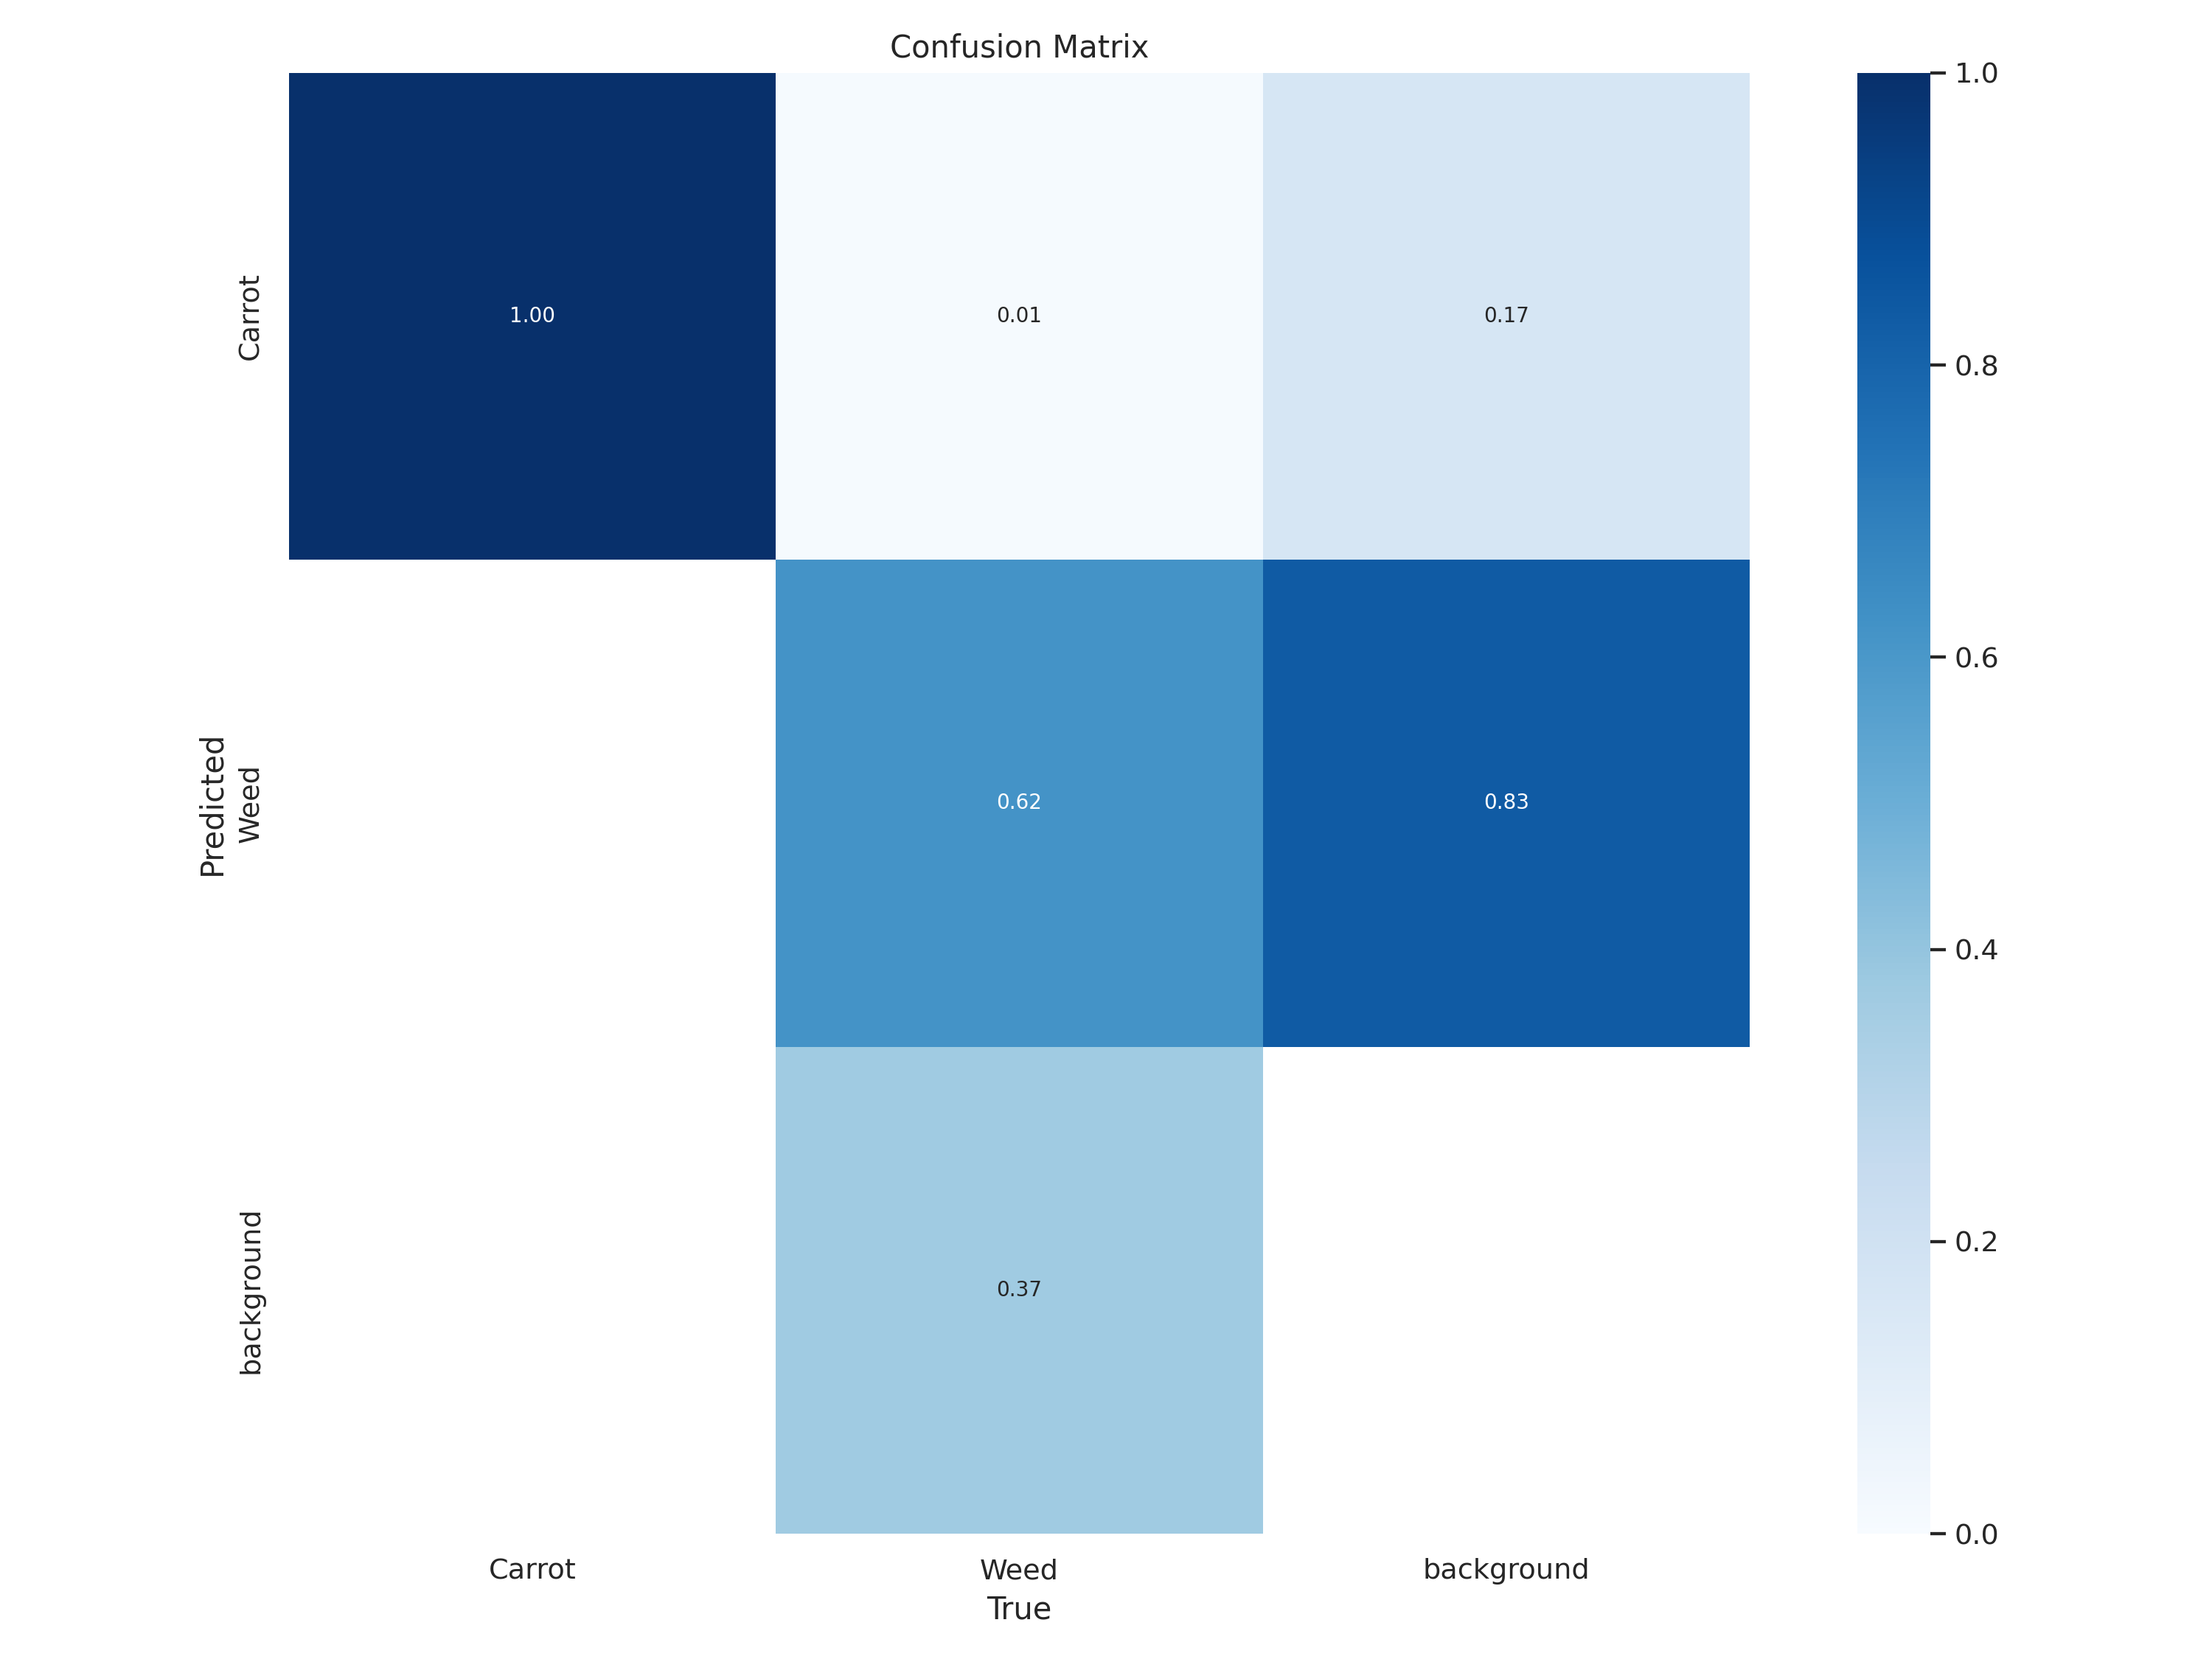

In [9]:
%cd {HOME}
Image(filename=f'{HOME}/runs/segment/train3/confusion_matrix.png', width=600)

**Training Curves**

/content


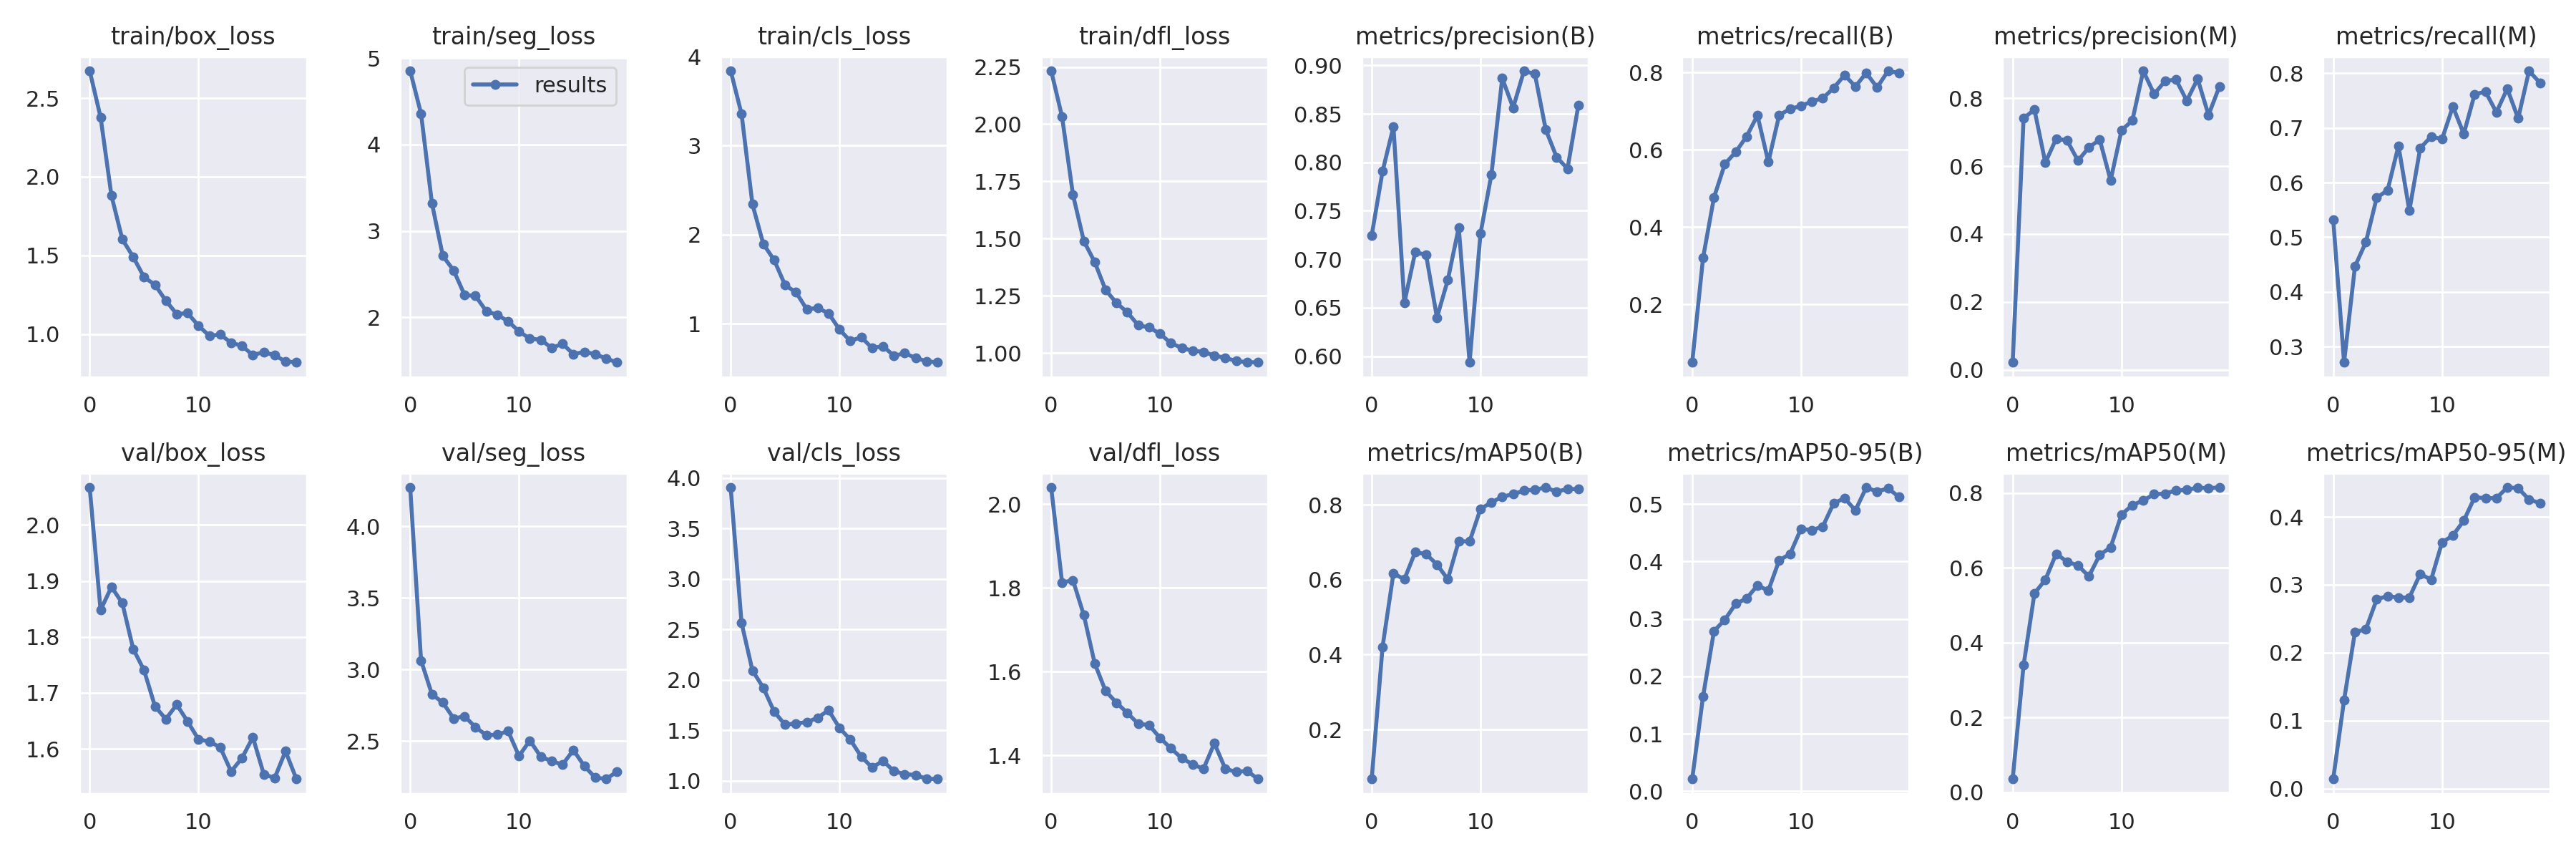

In [10]:
%cd {HOME}
Image(filename=f'{HOME}/runs/segment/train3/results.png', width=600)

**Batch Files**

/content


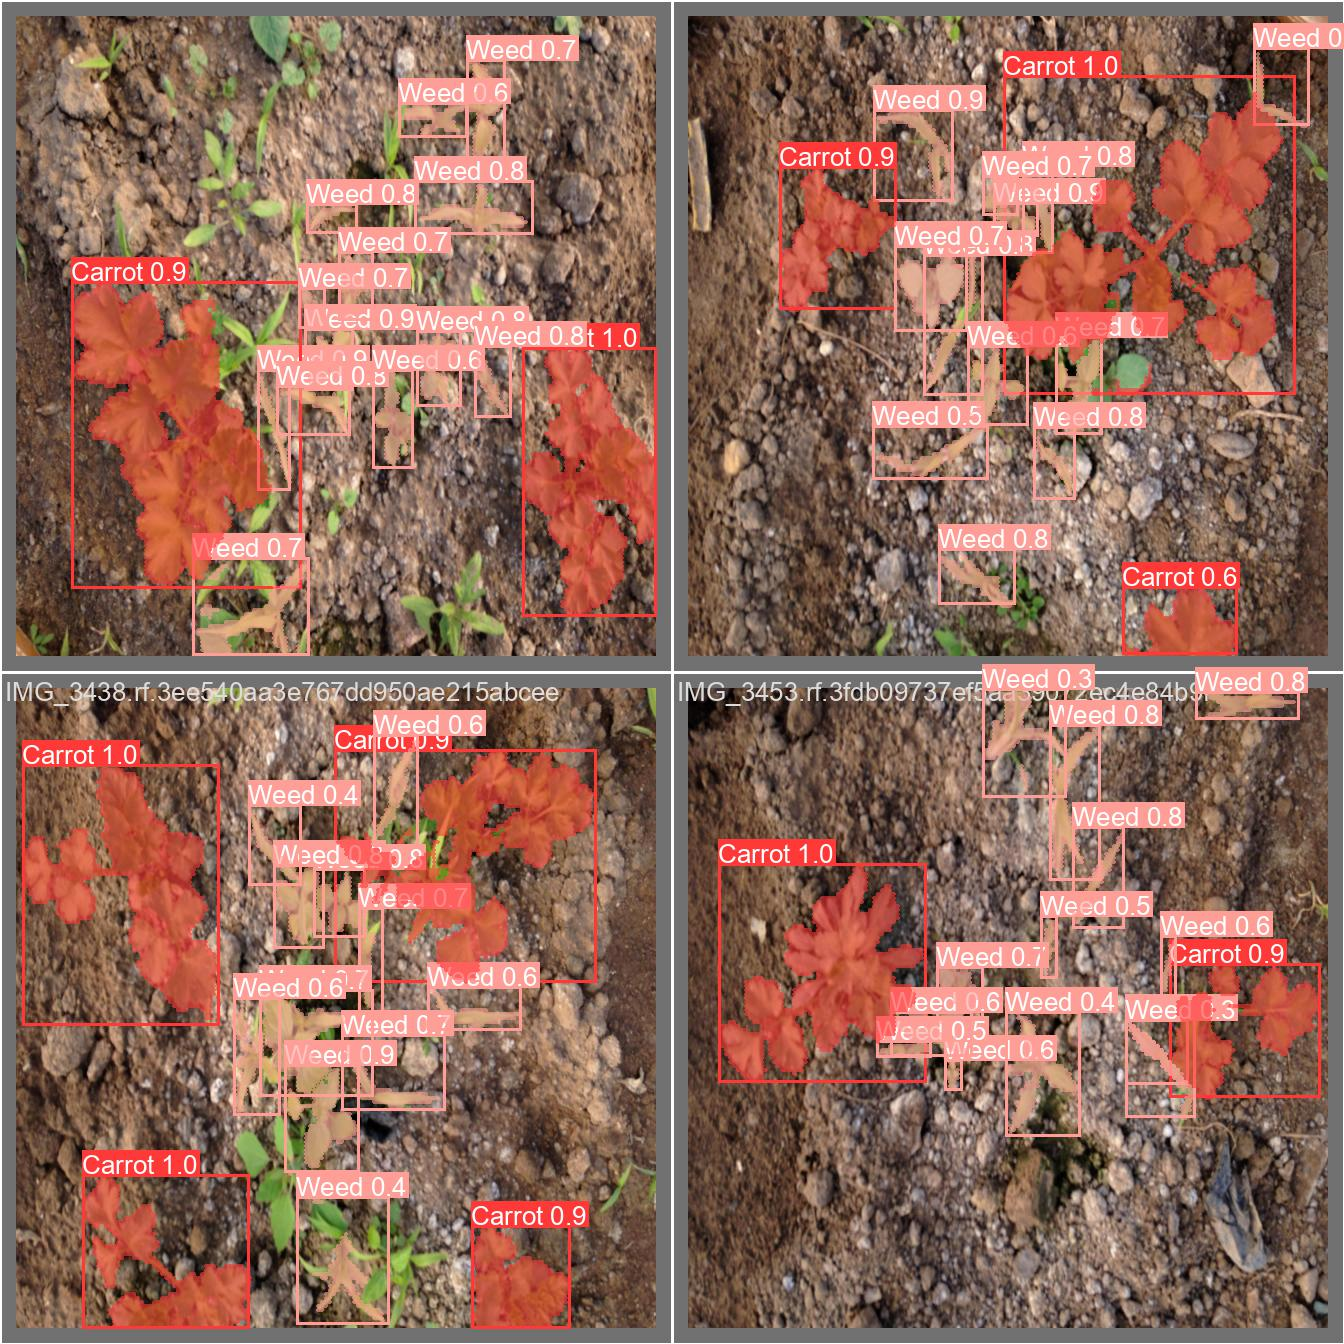

In [11]:
%cd {HOME}
Image(filename=f'{HOME}/runs/segment/train3/val_batch0_pred.jpg', width=600)

**Validation Steps**

In [12]:
%cd {HOME}

!yolo task=segment mode=val model={HOME}/runs/segment/train3/weights/best.pt data=/content/weed-1/data.yaml save=true

/content
2023-06-11 10:01:42.509178: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-11 10:01:43.386351: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8s-seg summary (fused): 195 layers, 11780374 parameters, 0 gradients, 42.4 GFLOPs
val: Scanning /content/weed-1/valid/labels.cache... 4 images, 0 backgrounds, 0 corrupt: 100% 4/4 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100% 1/1 [00:00<00:00,  1.86it/s]
                   all          4        102      0.825      0.793      0.843      0.517   

**Prediction**

In [13]:
%cd {HOME}
!yolo task=segment mode=predict model={HOME}/runs/segment/train3/weights/best.pt conf=0.25 source=/content/weed-1/test/images save=true

/content
2023-06-11 10:02:39.934596: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-11 10:02:40.878700: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8s-seg summary (fused): 195 layers, 11780374 parameters, 0 gradients, 42.4 GFLOPs

image 1/2 /content/weed-1/test/images/IMG_3457.rf.efd700b7d454b64b6a861ae1fd3699e6.jpg: 640x640 2 Carrots, 11 Weeds, 20.9ms
image 2/2 /content/weed-1/test/images/IMG_3473.rf.6a40a1ceb84bd8b5a8db913369ca17f2.jpg: 640x640 4 Carrots, 3 Weeds, 21.0ms
Speed: 0.6ms pre-process, 21.0ms inference, 70.4ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/segm

**Results**

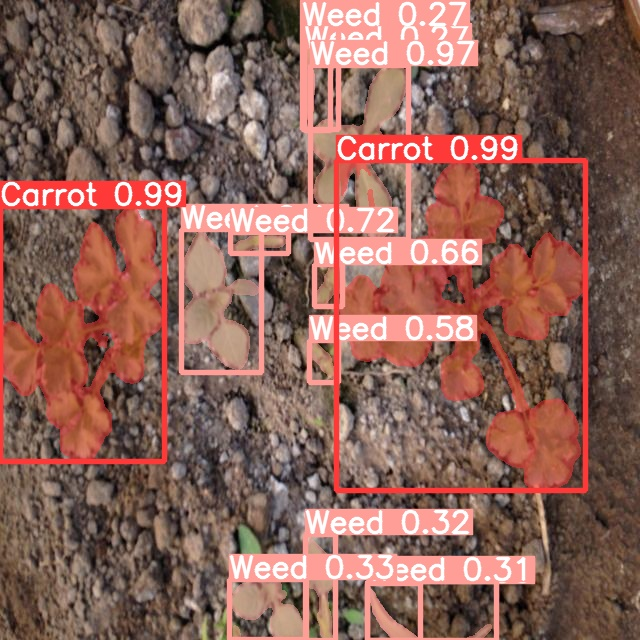

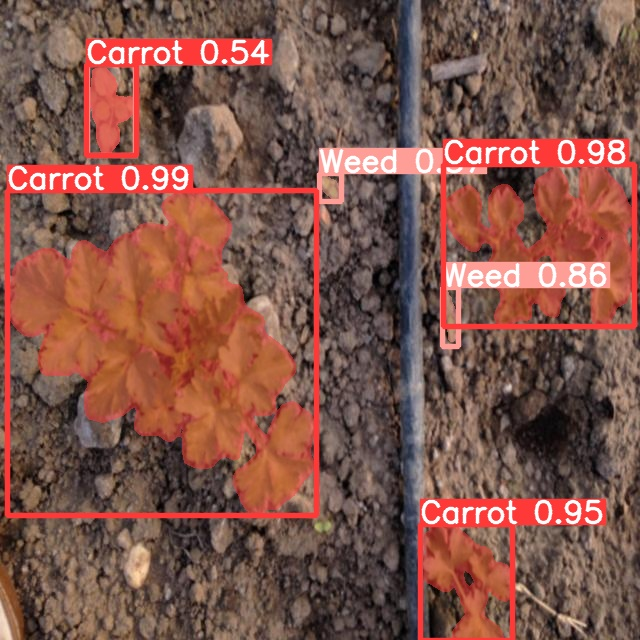

In [14]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/segment/predict/*.jpg')[:6]:
      display(Image(filename=image_path, height=600))
      print("\n")